# STUDENT PERFORMANCES
## Machine Learning project
## Team: Amadou and Jamie

* Analysis of student performances
* Features: 33 
* Data: 649

There are 2 different csv files in the data folder. One (student-port.csv) being the data set of the students that took the portugese language course and another (student-mat.csv) of the students that are taking the math course. There are 382 students that are taking both courses. 

More information about the dataset is in the data folder, labeled student.txt

In [1]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
from sklearn import metrics
import matplotlib.pyplot as plt 

In [2]:
df1 = pd.read_csv("data\student-por.csv",sep=";") #read file from different directory
df2 = pd.read_csv("data\student-mat.csv", sep = ";")
print(df1)
#df1.to_csv("port.csv") # made in to a csv after being made in to a table - easier to read compared to original excel file


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [3]:
#Splitting the data accordingly
X = df1.iloc[:, :30]
y = 0.3 * df1.iloc[:, 30] + 0.3 * df1.iloc[:, 31] + 0.4 * df1.iloc[:, 32]
X.dropna()
y.dropna()

0       7.7
1      10.4
2      12.3
3      14.0
4      12.4
       ... 
644    10.3
645    15.4
646    10.5
647    10.0
648    10.7
Length: 649, dtype: float64

In [4]:
def fixingfile(X):
    switch = {0: ("GP", "MS"), 1: ("F", "M"), 3: ("U", "R"), 4: ("LE3", "GT3"), 5:("T", "A"), 15:("yes","no"), 16:("yes","no"),
             17:("yes","no"), 18:("yes","no"), 19:("yes","no"), 20:("yes","no"), 21:("yes","no"), 22:("yes","no")}
    for column in range(len(X.columns)):
        if column not in switch:
            continue
        for i in range(len(X.iloc[:,column])):
           #print(X.iloc[i, column] == "U",X.iloc[i, column], switch[column])
            if X.iloc[i,column] == switch[column][0]:
                #print(X.iloc[i, column], switch[column][0])
                X.iloc[i,column] = 1
            elif X.iloc[i, column] == switch[column][1]:
                X.iloc[i,column] = 0
    X.drop(["Mjob", "Fjob", "reason", "guardian"], axis = 1, inplace=True) #Remove the ones with more than 1 and 0 answers
    print(X.shape) #Checking the shape of the features
    
    return X

In [5]:
X_fixed = fixingfile(X)
#X_fixed.to_csv("portfix.csv") 
y = np.array(y) #changed to array to be easier to work with
X = np.array(X_fixed)


(649, 26)


In [6]:
X_scale = StandardScaler()
X = np.array(X_scale.fit_transform(X))

In [7]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## Linear Regression

## 1. Multiple Linear Regression

In [8]:
#reshaping ys to 2d
y_2d_train = y_train.reshape(y_train.shape[0], 1)
y_2d_test = y_test.reshape(y_test.shape[0],1)
print("Checking y_2d_train is in 2d:", y_2d_train.shape)
print("Checking y_2d_test is in 2d:", y_2d_test.shape)

Checking y_2d_train is in 2d: (389, 1)
Checking y_2d_test is in 2d: (260, 1)


In [9]:
n_train = y_2d_train.shape[0]
n_test = y_2d_test.shape[0]
print("Number training of rows:", n_train)
print("Number testing of rows:", n_test)

Number training of rows: 389
Number testing of rows: 260


In [10]:
# Adding the column of ones infront of x_train
ones_train = np.ones((n_train, 1))
X_1_train = np.hstack((ones_train, X_train))
print("X_1 shape:", X_1_train.shape)
print("X_1 with ones: ", X_1_train)

X_1 shape: (389, 27)
X_1 with ones:  [[ 1.          0.73094388 -1.19993734 ...  1.33986431  1.01290255
  -0.35786305]
 [ 1.          0.73094388  0.83337685 ...  0.56067799 -0.3710422
   0.93602618]
 [ 1.          0.73094388 -1.19993734 ...  1.33986431  0.32093018
   0.07343336]
 ...
 [ 1.          0.73094388 -1.19993734 ...  2.11905063  1.01290255
   0.07343336]
 [ 1.          0.73094388  0.83337685 ... -0.99769466 -0.3710422
   1.36732259]
 [ 1.          0.73094388  0.83337685 ...  1.33986431 -1.75498694
  -0.78915946]]


In [11]:
#Adding ones to testing set
ones_test = np.ones((n_test, 1))
X_1_test = np.hstack((ones_test, X_test))
print("X_1_test shape:", X_1_test.shape)
print("X_1_test with ones: ", X_1_test)

X_1_test shape: (260, 27)
X_1_test with ones:  [[ 1.          0.73094388 -1.19993734 ... -0.21850834  1.01290255
   0.50472977]
 [ 1.         -1.36809408  0.83337685 ...  0.56067799 -1.06301457
  -0.78915946]
 [ 1.          0.73094388  0.83337685 ... -0.21850834  1.01290255
   0.93602618]
 ...
 [ 1.          0.73094388  0.83337685 ...  0.56067799  0.32093018
  -0.78915946]
 [ 1.         -1.36809408 -1.19993734 ... -0.99769466 -1.75498694
   0.28908157]
 [ 1.          0.73094388 -1.19993734 ...  2.11905063 -1.75498694
   1.79861901]]


In [12]:
def compute_cost(X_1, y_2d, w, N):
    # Write your code in place of ellipsis. Cost can be calculated using a single line of code.
    # Remember w is a vector here.
    
    # TODO Q07 - Taken from hw
    # Write the cost function
    #ISSUES: X AND Y ARE NOW 2D ARRAYS
    cost = sum((y_2d- (np.dot(X_1, w)))**2)/(2*N)
    
    return cost[0]

In [13]:
def gradient_descent(X_1, y_2d, learning_rate, w, N, num_iters):
    # In place of ellipsis, write the updated value of w0 in temp0 and of w1 in temp1
    # TODO Q08
    # Finish the gradient descent function
    
    for i in range(num_iters):
        # derivative vector is given by : X_train.Transpose *  (( X_train * w)- y ) 
        slope = np.dot(X_1, w)
        der_vector = np.dot(X_1.T,(slope - y_2d))
        w = w - (learning_rate * (1/N)) * der_vector
       
        
        if(i % 100 == 0):
            # In place of ellipsis, call the cost you just coded above
            cost = compute_cost(X_1, y_2d, w, N)
            # You can uncomment print statements below to see how cost changes, 
            # but please make sure you put prints in comments before submission
            #print("Cost")
            #print(cost)
             
    return w 

In [14]:
w_testcase = np.zeros((X_1_train.shape[1],1))
g = gradient_descent(X_1_train, y_2d_train, 0.0049, w_testcase, n_train, 1000)
print(g)
print("g[0]: ", g[0][0])

[[11.54961825]
 [ 0.40034306]
 [ 0.24638467]
 [ 0.05071532]
 [ 0.18703378]
 [ 0.14434399]
 [ 0.36707114]
 [ 0.37917753]
 [ 0.15168048]
 [ 0.13755112]
 [ 0.2275904 ]
 [-0.66522711]
 [-0.20968825]
 [-0.02454072]
 [-0.1390803 ]
 [ 0.05546516]
 [-0.09644351]
 [ 0.48499984]
 [ 0.21866696]
 [-0.11767917]
 [ 0.15602708]
 [-0.23442751]
 [-0.20693868]
 [-0.10931469]
 [-0.1125717 ]
 [-0.24185262]
 [-0.14088871]]
g[0]:  11.549618249038398


In [15]:
def multiple_linear_reg_model_gda(X_1, y_2d, learning_rate, N, num_iters):
    #initialize the values of parameter vector w. It should be a column vector of zeros of dimension(d+1,1)
    # TODO 09 
    # Complete the function
    w = np.zeros((X_1.shape[1],1))
    
    # Calculate the initial cost by calling the function you coded above.
    initial_cost = compute_cost(X_1, y_2d, w, N)
    
    # Calculate the optimized value of gradients by calling the gradient_descent function coded above
    w = gradient_descent(X_1, y_2d, learning_rate, w, N, num_iters)
    
    # Calculate the cost with the optimized value of w0 and w1 by calling the cost function.
    final_cost = compute_cost(X_1, y_2d, w, N)

    return w, initial_cost, final_cost

# The code below is to find the best possible rsq after running all possible iterations and alphas

In [84]:
def runningtest(num_rows):
    #Testing numbers on training set
    learning_rate = [0.1, 0.05,0.005, 0.00490, .001, 0.0005 ,0.0001]
    num_iters = [10,100, 1000, 10000]
    track = {}
    best_rsq = 0
    for nums in num_iters:
        print("*"* 50)
        print(nums)
        for alpha in learning_rate:
            results = multiple_linear_reg_model_gda(X_1_train, y_2d_train, alpha, n_train, nums)
            print("Iter is:", nums, "Alpha is:", alpha)
            #print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
            print("\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
            #print('-'*50)
            rss = 0
            for i in range(n_train):
                rss += np.sum((np.dot(results[0].T,X_1_train[i])-y_2d_train[i])**2)
            tss = np.sum((y_2d_train-np.mean(y_2d_train))**2) # TSS 
            print("RSS:",rss,"TSS:", tss)
            rsq = 1 - (rss/tss)
            print(rsq)
            if best_rsq<rsq:
                best_rsq = rsq
                track = {(nums,alpha): results, "RSS": rss ,"TSS":tss, "rsq":rsq}
            print('-'*50)
        print("*"* 50)
    return track

In [85]:
best = runningtest(n_train)

**************************************************
10
Iter is: 10 Alpha is: 0.1

initial cost:  71.96424164524426 
final cost:  10.960795652216099
RSS: 8527.499017424127 TSS: 3197.9523393316194
-1.666549752022382
--------------------------------------------------
Iter is: 10 Alpha is: 0.05

initial cost:  71.96424164524426 
final cost:  26.86387139378226
RSS: 20900.0919443626 TSS: 3197.9523393316194
-5.535460734455716
--------------------------------------------------
Iter is: 10 Alpha is: 0.005

initial cost:  71.96424164524426 
final cost:  65.04654528051888
RSS: 50606.21222824369 TSS: 3197.9523393316194
-14.824567366385617
--------------------------------------------------
Iter is: 10 Alpha is: 0.0049

initial cost:  71.96424164524426 
final cost:  65.17780615879204
RSS: 50708.33319154021 TSS: 3197.9523393316194
-14.856500601299889
--------------------------------------------------
Iter is: 10 Alpha is: 0.001

initial cost:  71.96424164524426 
final cost:  70.52106582232005
RSS: 548

In [86]:
print("Printing out the result after running code")
print(best)
print("Best rsq for all the iterations and alpha:", best['rsq'])

Printing out the result after running code
{(10000, 0.1): (array([[ 1.16723971e+01],
       [ 4.84309650e-01],
       [ 3.00295411e-01],
       [ 6.26013501e-02],
       [ 1.55625340e-01],
       [ 2.02354028e-01],
       [ 3.49630132e-01],
       [ 3.85206631e-01],
       [ 1.44654707e-01],
       [ 1.85185284e-01],
       [ 2.40959474e-01],
       [-6.87332818e-01],
       [-2.53295372e-01],
       [ 3.14225118e-03],
       [-9.77176974e-02],
       [ 3.74743788e-02],
       [-1.48804703e-01],
       [ 4.67156488e-01],
       [ 2.12772250e-01],
       [-1.49572967e-01],
       [ 1.45178424e-01],
       [-1.86938774e-01],
       [-2.35225109e-01],
       [-1.38611587e-01],
       [-5.91970826e-02],
       [-2.45775728e-01],
       [-1.82377802e-01]]), 71.96424164524426, 2.5710714207362817), 'RSS': 2000.293565332827, 'TSS': 3197.9523393316194, 'rsq': 0.37450801228923447}
Best rsq for all the iterations and alpha: 0.37450801228923447


## Running different iteration to see the behavior of the data with values 
## num_iters = [10,100, 1000, 10000]

In [87]:
def different_iterations(X_iter, y_iter, num_rows, num_iters):
    rsq_all = []
    mse_all = []
    w = []
    for i in num_iters:
        results = multiple_linear_reg_model_gda(X_iter, y_iter, 0.5 , n_train, i)
        print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
        rss = 0
        for i in range(num_rows):
            rss += (np.dot(results[0].T,X_iter[i])-y_iter[i])**2
        tss = np.sum((y_iter-np.mean(y_iter))**2 )# TSS 
        #print("RSS:",rss,"TSS:", tss)
        rsq = 1 - (rss/tss)
        print("rsq:", rsq[0])
        mse_all.append(1/num_rows * rss)
        rsq_all.append(rsq[0]*100)
        print('-'*50)
        w.append(results[0])
    return rsq_all, mse_all, w
        

In [88]:
#Running test
#track, rsq_all, w_train = runningtest(X_1_train, y_2d_train, n_train)
#learning_rate = [0.01, 0.05, 0.001, 0.0049, 0.005, 0.0001, 0.0005, 0.0001]
num_iters = [10,100, 1000, 10000]
rsq_iter, mse_iter, w_iter = different_iterations(X_1_train, y_2d_train, n_train, num_iters)

w:  [[ 1.16371462e+01]
 [ 4.22562900e-01]
 [ 2.59153079e-01]
 [ 4.85551324e-02]
 [ 1.80933883e-01]
 [ 1.69141933e-01]
 [ 3.53470154e-01]
 [ 3.73572535e-01]
 [ 1.51410222e-01]
 [ 1.56204911e-01]
 [ 2.40123551e-01]
 [-6.68195958e-01]
 [-2.28073043e-01]
 [-7.55591959e-03]
 [-1.24256318e-01]
 [ 4.88485348e-02]
 [-1.18589785e-01]
 [ 4.78090812e-01]
 [ 2.19522684e-01]
 [-1.34906423e-01]
 [ 1.53310551e-01]
 [-2.20388978e-01]
 [-2.07064182e-01]
 [-1.14362555e-01]
 [-1.06032058e-01]
 [-2.43738793e-01]
 [-1.57533556e-01]] 
initial cost:  71.96424164524426 
final cost:  2.5752752608864977
rsq: 0.3734852992248018
--------------------------------------------------
w:  [[ 1.16723971e+01]
 [ 4.84309650e-01]
 [ 3.00295403e-01]
 [ 6.26013442e-02]
 [ 1.55625341e-01]
 [ 2.02354025e-01]
 [ 3.49630130e-01]
 [ 3.85206603e-01]
 [ 1.44654728e-01]
 [ 1.85185280e-01]
 [ 2.40959473e-01]
 [-6.87332814e-01]
 [-2.53295376e-01]
 [ 3.14224832e-03]
 [-9.77176989e-02]
 [ 3.74743800e-02]
 [-1.48804700e-01]
 [ 4.67156490

In [89]:
# The best rsq on training set based off gradient method
print("The best rsq based off different iterations:", max(rsq_iter))

The best rsq based off different iterations: 37.45080122892341


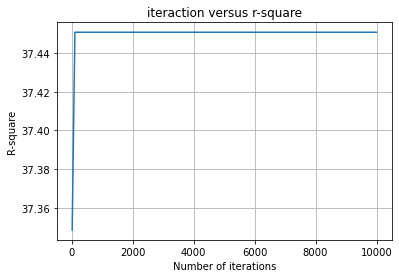

In [90]:
plt.title("iteraction versus r-square")
plt.plot(num_iters, rsq_iter)
plt.xlabel("Number of iterations")
plt.ylabel("R-square")
plt.grid()

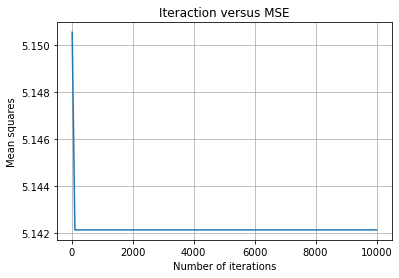

In [91]:
plt.title("Iteraction versus MSE")
plt.plot(num_iters,mse_iter)
plt.xlabel("Number of iterations")
plt.ylabel("Mean squares")
plt.grid()

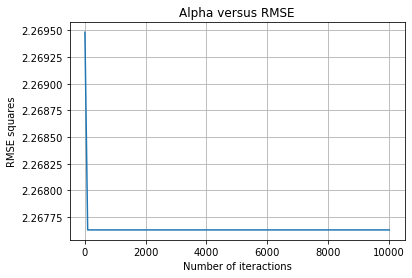

In [92]:
#Iterations versus RMSE
rmse_iter = np.sqrt(mse_iter)
plt.title("Alpha versus RMSE")
plt.plot(num_iters,rmse_iter)
plt.xlabel("Number of iteractions")
plt.ylabel("RMSE squares")
plt.grid()

## Running different learning rates to see the behavior of the data with values 
## learning_rate = [0.01, 0.05, 0.001, 0.0049, 0.005, 0.0001, 0.0005, 0.0001]

In [93]:
def different_learning(X_alpha, y_alpha, num_rows, learning_rate):
    rsq_all = []
    mse_all = []
    w = []
    for i in learning_rate:
        results = multiple_linear_reg_model_gda(X_alpha, y_alpha, i , n_train, 100)
        print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
        rss = 0
        for i in range(num_rows):
            rss += (np.dot(results[0].T,X_alpha[i])-y_alpha[i])**2
        tss = np.sum((y_alpha-np.mean(y_alpha))**2 )# TSS 
        #print("RSS:",rss,"TSS:", tss)
        rsq = 1 - (rss/tss)
        print("rsq:", rsq[0])
        mse_all.append(1/num_rows * rss)
        rsq_all.append(rsq[0]*100)
        print('-'*50)
        w.append(results[0])
    return rsq_all, mse_all, w

In [94]:
learning_rate = [0.1, 0.05,0.005, 0.00490, .001, 0.0005 ,0.0001]
rsq_alpha, mse_alpha, w_alpha = different_learning(X_1_train, y_2d_train, n_train, learning_rate)

w:  [[ 1.16701325e+01]
 [ 4.77076205e-01]
 [ 2.94023537e-01]
 [ 5.87565879e-02]
 [ 1.59338792e-01]
 [ 1.98770161e-01]
 [ 3.49060869e-01]
 [ 3.79584530e-01]
 [ 1.48364836e-01]
 [ 1.81718505e-01]
 [ 2.41613342e-01]
 [-6.84340780e-01]
 [-2.52209081e-01]
 [ 1.64491709e-03]
 [-1.00474663e-01]
 [ 3.89577816e-02]
 [-1.45710006e-01]
 [ 4.68094857e-01]
 [ 2.14617783e-01]
 [-1.48023162e-01]
 [ 1.45279268e-01]
 [-1.92283493e-01]
 [-2.28620496e-01]
 [-1.33234784e-01]
 [-6.99360134e-02]
 [-2.45107543e-01]
 [-1.80136762e-01]] 
initial cost:  71.96424164524426 
final cost:  2.5711535520857387
rsq: 0.3744880313191956
--------------------------------------------------
w:  [[11.56893209]
 [ 0.40538301]
 [ 0.24943581]
 [ 0.05052768]
 [ 0.18548542]
 [ 0.14946637]
 [ 0.36462279]
 [ 0.37834985]
 [ 0.15158458]
 [ 0.14145653]
 [ 0.22994862]
 [-0.66617994]
 [-0.2133346 ]
 [-0.02116063]
 [-0.1359566 ]
 [ 0.05406183]
 [-0.1009128 ]
 [ 0.48371312]
 [ 0.21873694]
 [-0.12111098]
 [ 0.15554222]
 [-0.23132341]
 [-0.2

In [95]:
# The best rsq on training set based off different alphas
print("The best rsq based off different alpha:", max(rsq_alpha))

The best rsq based off different alpha: 37.44880313191956


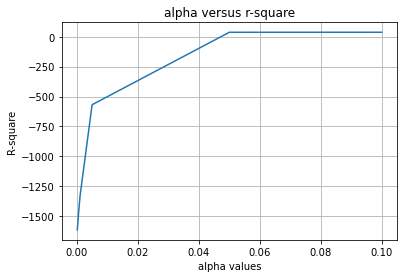

In [96]:
#print(rsq_alpha)
plt.title("alpha versus r-square")
plt.plot(learning_rate, rsq_alpha)
plt.xlabel("alpha values")
plt.ylabel("R-square")
plt.grid()

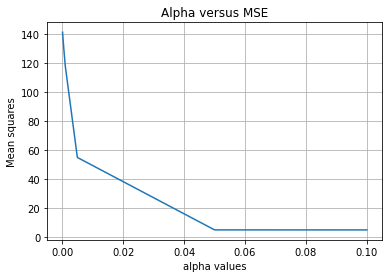

In [97]:
#Learning rate versus Mean squared error
plt.title("Alpha versus MSE")
plt.plot(learning_rate,mse_alpha)
plt.xlabel("alpha values")
plt.ylabel("Mean squares")
plt.grid()

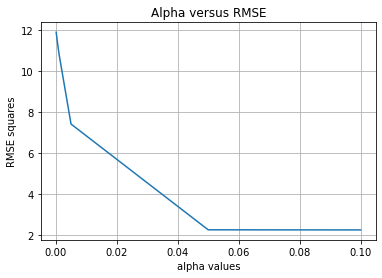

In [98]:
#Learning rate versus RMSE
rmse_alpha = np.sqrt(mse_alpha)
plt.title("Alpha versus RMSE")
plt.plot(learning_rate,rmse_alpha)
plt.xlabel("alpha values")
plt.ylabel("RMSE squares")
plt.grid()

# Using sklearn library to calculate
## Code is taken from the demo 02. Mostly used to check whether code above is correct

In [29]:
#Creating our regression
regr = linear_model.LinearRegression()
regr.fit(X_train,y_2d_train)

LinearRegression()

In [30]:
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)
print('The rsq(r^2) = ', regr.score(X_train, y_2d_train))

The intercept w0 =  [11.67239709]
The coefficients w[1..d]= [[ 0.48430965  0.30029541  0.06260135  0.15562534  0.20235403  0.34963013
   0.38520663  0.14465471  0.18518528  0.24095947 -0.68733282 -0.25329537
   0.00314225 -0.0977177   0.03747438 -0.1488047   0.46715649  0.21277225
  -0.14957297  0.14517842 -0.18693877 -0.23522511 -0.13861159 -0.05919708
  -0.24577573 -0.1823778 ]]
The rsq(r^2) =  0.37450801228923447


In [31]:
y_tr_pred = regr.predict(X_train)
RSS = np.sum((y_tr_pred-y_2d_train)**2)
TSS = np.sum((y_2d_train - np.mean(y_2d_train))**2)
print("RSS = {0:f}".format(RSS))
print("Ein = {0:f}".format(RSS/y_train.shape[0]))
print("RMSE = {0:f}".format(np.sqrt(RSS/y_train.shape[0])))
print("R^2 = {0:f}".format(1-RSS/TSS))

RSS = 2000.293565
Ein = 5.142143
RMSE = 2.267629
R^2 = 0.374508


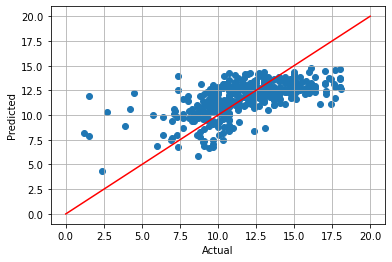

In [32]:
plt.scatter(y_2d_train,y_tr_pred)
#Set to 20, because maximum score for y is 20
plt.plot([0, 20],[0, 20],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

# Validating over the testing set

In [33]:
y_test_pred = regr.predict(X_test)
y_tr_pred = regr.predict(X_train)
RSS = np.sum((y_test_pred-y_2d_test)**2)
TSS = np.sum((y_2d_test - np.mean(y_2d_test))**2)
print("RSS = {0:f}".format(RSS))
print("Ein = {0:f}".format(RSS/n_test))
print("RMSE = {0:f}".format(np.sqrt(RSS/n_test)))
print("R^2 = {0:f}".format(1-RSS/TSS))

RSS = 1487.637541
Ein = 5.721683
RMSE = 2.392004
R^2 = 0.295055


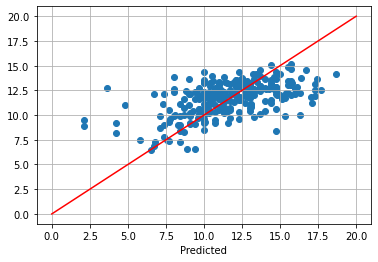

In [34]:
plt.scatter(y_2d_test,y_test_pred)
plt.plot([0,20],[0,20],'r')
plt.xlabel('Actual')
plt.xlabel('Predicted')
plt.grid()

# Attempting to use regularization in hopes of getting better rsq values
### Will be using the sklearn regularization library, below is the link to the library
### https://scikit-learn.org/stable/modules/linear_model.html

# ridge regression

In [35]:
def ridge(X_ridge, y_ridge, lamda):
    rsq = {}
    mse = []
    w_ridge = []
    for l in lamda:
        ridgereg = linear_model.Ridge(alpha = l)
        ridgereg.fit(X_ridge, y_ridge)
        #print('The intercept w0 = ', ridgereg.intercept_)
        #print('The coefficients w[1..d]=', ridgereg.coef_)
        #print('The rsq(r^2) = ', ridgereg.score(X_ridge, y_ridge))
        #print('-'* 70)
        rsq[l] = ridgereg.score(X_ridge, y_ridge)*100
        weight =ridgereg.coef_
        y_ridge_pred = ridgereg.predict(X_ridge)
        w_ridge.append(weight)
        rss = np.sum((y_ridge_pred - y_ridge)**2)
        mse.append(1/len(X_ridge)* rss)
    return rsq, w_ridge, mse

In [36]:
lamda = [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
rsq_train,w_ridge_train,mse_ridge_train = ridge(X_train, y_2d_train, lamda) #Couldn't use x_1_train due to matrix size difference
rsq_test, w_ridge_test,mse_ridge_test = ridge(X_test, y_2d_test, lamda) 
print("Ridge library on training set: ", rsq_train)
print("*"*60)
print("Ridge library on testing set: ", rsq_test)

Ridge library on training set:  {0.001: 37.45080122876533, 0.01: 37.450801213113415, 0.1: 37.450799649158625, 0.5: 37.45076187191444, 1: 37.4506444812032, 10: 37.4362594651678, 100: 36.61720042045067}
************************************************************
Ridge library on testing set:  {0.001: 43.44474877224174, 0.01: 43.444748721861004, 0.1: 43.44474368942712, 0.5: 43.44462231300472, 1: 43.444246015969, 10: 43.39944286149764, 100: 41.2271629456817}


In [37]:
#Reshaping the weight list
w_ridge_train = np.array(w_ridge_train).reshape((len(lamda),26))
w_ridge_test = np.array(w_ridge_test).reshape((len(lamda),26))

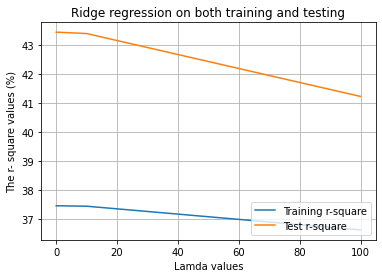

In [38]:
plt.title("Ridge regression on both training and testing")
plt.xlabel("Lamda values")
plt.ylabel("The r- square values (%)")
plt.plot(rsq_train.keys(), rsq_train.values())
plt.plot(rsq_test.keys(),rsq_test.values())
plt.grid()
plt.legend(['Training r-square', 'Test r-square'], loc='lower right')

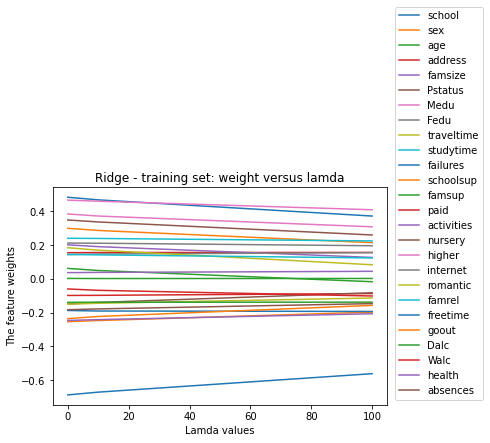

In [39]:
plt.title("Ridge - training set: weight versus lamda")
plt.xlabel("Lamda values")
plt.ylabel("The feature weights")
plt.plot(lamda, w_ridge_train)
plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right') 

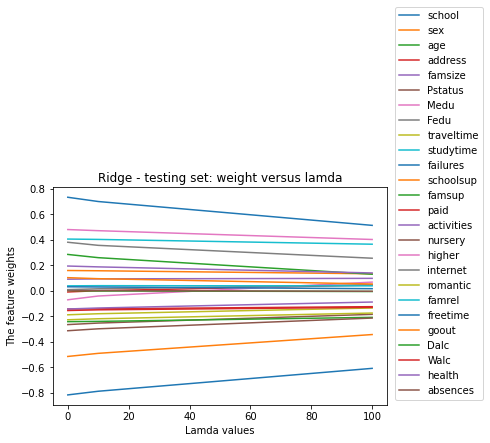

In [40]:
plt.title("Ridge - testing set: weight versus lamda")
plt.xlabel("Lamda values")
plt.ylabel("The feature weights")
plt.plot(lamda, w_ridge_test)
plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right') 

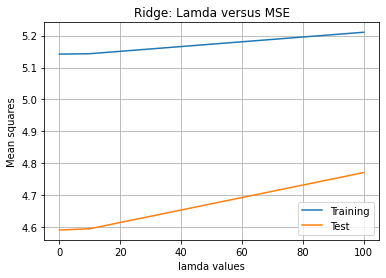

In [71]:
#Learning rate versus Mean squared error
plt.title("Ridge: Lamda versus MSE")
plt.plot(lamda,mse_ridge_train)
plt.plot(lamda,mse_ridge_test)
plt.xlabel("lamda values")
plt.ylabel("Mean squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

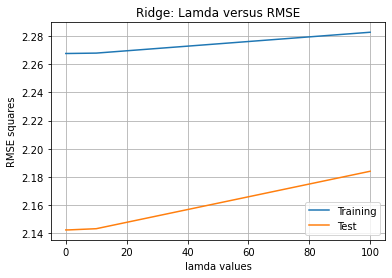

In [74]:
#Learning rate versus RMSE
rmse_ridge_tr = np.sqrt(mse_ridge_train)
rmse_ridge_test = np.sqrt(mse_ridge_test)
plt.title("Ridge: Lamda versus RMSE")
plt.plot(lamda,rmse_ridge_tr)
plt.plot(lamda,rmse_ridge_test)
plt.xlabel("lamda values")
plt.ylabel("RMSE squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

## Multiple regression with Lasso

In [57]:
def lasso(X_lasso, y_lasso):
    lamda = [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
    rsq = {}
    w = []
    mse = []
    for l in lamda:
        lasso_reg = linear_model.Lasso(alpha = l)
        lasso_reg.fit(X_lasso, y_lasso)
        #print('The intercept w0 = ', regr.intercept_)
        #print('The coefficients w[1..d]=', regr.coef_)
        #print('The rsq(r^2) = ', lasso_reg.score(X_train, y_2d_train))
        #print('-'* 70)
        rsq[l] = lasso_reg.score(X_lasso, y_lasso)*100
        weight = lasso_reg.coef_
        y_lasso_pred = lasso_reg.predict(X_lasso)
        w.append(weight)
        #mse_test = metrics.mean_squared_error(y_lasso, y_lasso_pred) <--used this only to check my work
        rss = 0
        for i in range(len(X_lasso)):
            rss += (y_lasso_pred[i] - y_lasso[i])**2
        #print(rss)
        mse.append(1/len(X_lasso)* rss[0])
    return rsq, w, mse

In [58]:
rsq_lasso_train, w_lasso_tr, mse_lasso_train = lasso(X_train, y_2d_train) #Couldn't use x_1_train due to matrix size difference
rsq_lasso_test, w_lasso_test, mse_lasso_test = lasso(X_test, y_2d_test) 
print("Lasso library on training set: ", rsq_lasso_train)
print("*"*60)
print("Lasso library on testing set: ", rsq_lasso_test)
#print(mse_lasso_train)

Lasso library on training set:  {0.001: 37.45044931904965, 0.01: 37.41738290202701, 0.1: 35.08977209057625, 0.5: 20.46371256019518, 1: 3.738483612753052, 10: 0.0, 100: 0.0}
************************************************************
Lasso library on testing set:  {0.001: 43.444329963905794, 0.01: 43.409177181626916, 0.1: 41.22126813101738, 0.5: 25.23357786064929, 1: 5.049301436487486, 10: 0.0, 100: 0.0}
[5.142171771832565, 5.144890147813826, 5.336242035719534, 6.53864412544668, 7.913618033887028, 8.220957170518286, 8.220957170518286]


In [43]:
#Reshaping the weight list
w_lasso_tr = np.array(w_lasso_tr).reshape((len(lamda),26))
w_lasso_test = np.array(w_lasso_test).reshape((len(lamda),26))

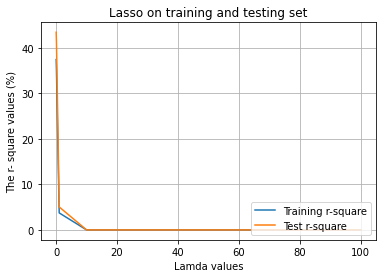

In [44]:
plt.title("Lasso on training and testing set")
plt.xlabel("Lamda values")
plt.ylabel("The r- square values (%)")
plt.plot(rsq_lasso_train.keys(), rsq_lasso_train.values())
plt.plot(rsq_lasso_test.keys(), rsq_lasso_test.values())
plt.legend(['Training r-square', 'Test r-square'], loc='lower right')
plt.grid()

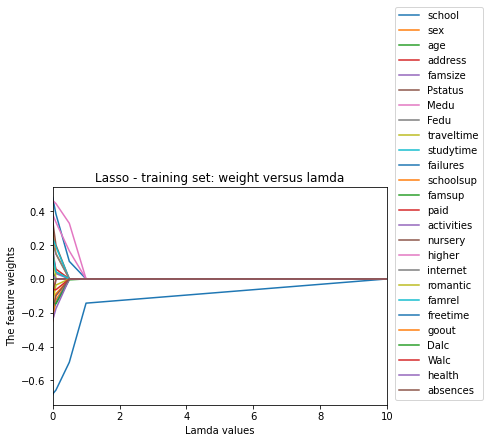

In [45]:
plt.title("Lasso - training set: weight versus lamda")
plt.xlabel("Lamda values")
plt.ylabel("The feature weights")
plt.plot(lamda, w_lasso_tr)
plt.xlim(0,10) #Limiting x to see the weight better
plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right') 

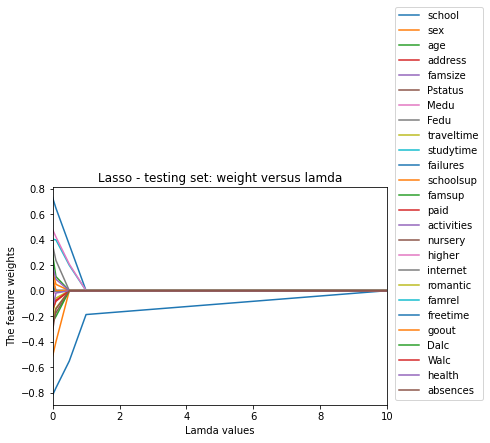

In [46]:
plt.title("Lasso - testing set: weight versus lamda")
plt.xlabel("Lamda values")
plt.ylabel("The feature weights")
plt.plot(lamda, w_lasso_test)
plt.xlim(0,10) #Limiting x to see the weight better
plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right') 

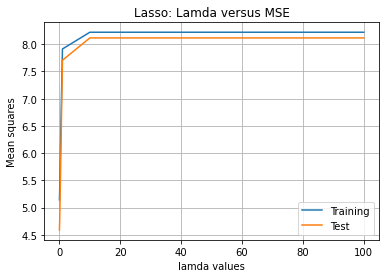

In [75]:
#Learning rate versus Mean squared error
plt.title("Lasso: Lamda versus MSE")
plt.plot(lamda,mse_lasso_train)
plt.plot(lamda,mse_lasso_test)
plt.xlabel("lamda values")
plt.ylabel("Mean squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

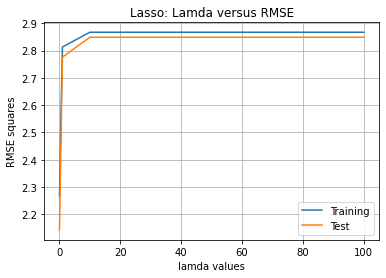

In [76]:
#Learning rate versus RMSE
rmse_lasso_tr = np.sqrt(mse_lasso_train)
rmse_lasso_test = np.sqrt(mse_lasso_test)
plt.title("Lasso: Lamda versus RMSE")
plt.plot(lamda,rmse_lasso_tr)
plt.plot(lamda,rmse_lasso_test)
plt.xlabel("lamda values")
plt.ylabel("RMSE squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

# Everything below this are code that are done, but didn't make the cut or was consider inefficient